# Workshop #1: Linear Algebra

In [1]:
#importing libraries
import numpy
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

## Problem 1: Matrix multiplication with the rotation matrix

1. Given an arbitrary angle $\theta$, we can define a rotation matrix 𝑅 by


$$
R_{\theta} =
\begin{pmatrix}
cos \theta & -sin \theta \\
sin \theta & cos \theta \\
\end{pmatrix}
$$

This matrix has the effect that any vector in standard position is rotated counterclockwise by an angle $\theta$. If $v$ is in standard position, then the rotated vector $v_r$ is obtained as $v_r = R_{\theta}v$. We will use this matrix to illustrate why matrix multiplication is defined in a very unusual way. We will use two angles, $\alpha$ = 30° and $\beta$ = 45°,
and the vector $v = [1,0]^T$ for demonstration.

To achieve this, we will do the following:
- Calculate the matrices $R_{30°}$ and $R_{45°}$. Since some of the results will be decimal numbers, round them to 4 decimal places. Note: for example, for sin 30° in Python you must write np.sin(np.radians(30))
- Choose one angle (matrix) and rotate the vector $v$ by that angle. Call the output $v_1$.
- Now use the other angle (matrix) to rotate the output $v_1$ of the previous rotation $v_2$.
- In terms of angle of rotation, how does the final output $v_2$ compare to the original input $v$?
- Now calculate the matrix $R_{mult} = R_{30°} ⋅ R_{45°}$. Then use this matrix to rotate the vector $v$. Call the
output $v_{mult}$. How does $v_{mult}$ compare to $v_2$? Seeing this relation, what is the meaning of the matrix
$R_{mult} = R_{30°} ⋅ R_{45°}$ in terms of rotating vectors by some angle?
- To wrap up, calculate $R_{75°}$ using $\theta = 75°$ in the expression for $R_{\theta}$. How does $R_{75°}$ compare to $R_{mult}$?

In [164]:
#Calculate the matrices  𝑅30°  and  𝑅45°, round them to 4 decimal places.
NegSin_30= -round(np.sin(np.radians(30)),4)
sin_30 = round(np.sin(np.radians(30)),4)
cos_30 = round(np.cos(np.radians(30)),4)

R_30 = ([cos_30, NegSin_30], [sin_30, cos_30])
#R_30_matrix = np.array(R_30)
print("R_30_matrix = \n",np.array(R_30))
print("-------------------------------------")

NegSin_45= -round(np.sin(np.radians(45)),4)
sin_45 = round(np.sin(np.radians(45)),4)
cos_45 = round(np.cos(np.radians(45)),4)

R_45 = ([cos_45, NegSin_45], [sin_45, cos_45])
print("R_45_matrix = \n",np.array(R_45))
#print(R_45_matrix)
print("-------------------------------------")

#Choose one angle (matrix) and rotate the vector  𝑣  by that angle. Call the output  𝑣1 .
v = np.array([1, 0])
v1 = R_30_matrix * v
print("v1 = \n", v1)
print("-------------------------------------")

#Now use the other angle (matrix) to rotate the output  𝑣1  of the previous rotation  𝑣2 .
print("v2= \n",R_45_matrix.dot(v1))
print("-------------------------------------")

#In terms of angle of rotation, how does the final output  𝑣2  compare to the original input  𝑣 ?
#-----
print("both vectors are moving in the similar direction, with the difference that v2 is more close to perpendicular ")
print("-------------------------------------")
#Now calculate the matrix  𝑅𝑚𝑢𝑙𝑡=𝑅30°⋅𝑅45° . 
print("R_mult= \n",R_45_matrix.dot(R_30_matrix))
print("-------------------------------------")
#To wrap up, calculate  𝑅75°  using  𝜃=75°  in the expression for  𝑅𝜃 . How does  𝑅75°  compare to  𝑅𝑚𝑢𝑙𝑡 ?
NegSin_75= -round(np.sin(np.radians(75)),4)
sin_75 = round(np.sin(np.radians(75)),4)
cos_75 = round(np.cos(np.radians(75)),4)

R_75 = ([cos_75, NegSin_75], [sin_75, cos_75])
#R_75_matrix = np.array(R_30)
print("R_75_matrix = \n",np.array(R_75))
print("NOTE: 𝑅75°  compare to  𝑅𝑚𝑢𝑙𝑡 are identical")

R_30_matrix = 
 [[ 0.866 -0.5  ]
 [ 0.5    0.866]]
-------------------------------------
R_45_matrix = 
 [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
-------------------------------------
v1 = 
 [[ 0.866 -0.   ]
 [ 0.5    0.   ]]
-------------------------------------
v2= 
 [[0.2587986 0.       ]
 [0.9658986 0.       ]]
-------------------------------------
both vectors are moving in the similar direction, with the difference that v2 is more close to perpendicular 
-------------------------------------
R_mult= 
 [[ 0.2587986 -0.9658986]
 [ 0.9658986  0.2587986]]
-------------------------------------
R_75_matrix = 
 [[ 0.2588 -0.9659]
 [ 0.9659  0.2588]]
NOTE: 𝑅75°  compare to  𝑅𝑚𝑢𝑙𝑡 are identical


## Problem 2: System of linear equations

A system of linear equations of the form

\begin{align}
\begin{cases}
a_{11}x_1+a_{12}x_2 = b_1 \\
a_{21}x_1+a_{22}x_2 = b_2 \\
\end{cases}
\end{align}

where $x_1$, $x_2$ are the variables and $a_{11}, a_{12}, a_{21}, a_{22}$ are some numbers/coefficients, can be represented in a matrix form

\begin{align}
Ax = b
\end{align}
where
$$
A = 
\begin{pmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}\\
\end{pmatrix}
$$
\
$$
x = 
\begin{pmatrix}
x_{1}\\
x_{2}\\
\end{pmatrix}
$$
\
$$
b = 
\begin{pmatrix}
b_{1}\\
b_{2}\\
\end{pmatrix}
$$

We can solve this system using inverse matrices:

$$
{A^{-1} Ax = A^{-1} b}\\
{I_n x = A^{-1} b} \\
{x  =A^{-1} b}
$$

Basically, to solve a system of linear equations, one must find the inverse of matrix $A$, and multiply it by the vector-column of the “results”. Use this approach to solve the following systems:

a) 

\begin{align}
\begin{cases}
2x+3y = 4 \\
5x+4y = 7 \\
\end{cases}
\end{align}

b)

\begin{align}
\begin{cases}
x+3y-2z = 5 \\
3x+5y+6z = 7 \\
2x+4y+3z = 8 \\
\end{cases}
\end{align}


a)

In [107]:
A = np.array([[2, 3], [5, 4]])
B = np.array([4, 7])

xy = nla.inv(A).dot(B)

print('Solution xy =')
print(xy)
print()

print('Check if xy really is a solution')
print(np.allclose(A.dot(xy),B))


Solution xy =
[0.71428571 0.85714286]

Check if xy really is a solution
True


b)

In [108]:
A = np.array([[1, 3, -2], [3, 5, 6], [2, 4, 3]])
B = np.array([5, 7, 8])

xyz = nla.inv(A).dot(B)

print('Solution xyz =')
print(xyz)
print()

print('Check if xyz really is a solution')
print(np.allclose(A.dot(xyz),B))

Solution xyz =
[-15.   8.   2.]

Check if xyz really is a solution
True


## Problem 3: Weather Data
The file *Weather.csv* contains weather data in great detail. There are four feature-vectors in the table **T** (temperature in ℃), **P** (air pressure in hPa), **H** (humidity in %) and **W** (wind speed in km/h). The data is indexed by time, as given by the column Local Time.
* There are some missing data in the vectors. Before we start any calculations, we need to take care of this (and there are many ways in which you can handle this). Remove the rows that contain missing data in any of the columns.
* The vectors contain values which are of different magnitudes and variability. We “fix” this in a two step process. Normalize the vectors using the Euclidean norm, then center the normalized vectors.
* In the last step, we calculate the similarity matrix of the *normalized and centered feature-vectors*. Are there any vectors that are not similar, based on their similarity measure?

**Note: Centering the vectors means subtracting the average of the vector from every element of the vector**

In [31]:
# Load the raw data and print the head

df_weather = pd.read_csv("Weather.csv")
df_weather

,Local time,T,P,H,W
0,28.02.2018 22:00,-6.1,739.3,69.0,2.0
1,28.02.2018 19:00,-5.0,737.7,70.0,2.0
2,28.02.2018 16:00,-4.4,734.8,100.0,4.0
3,28.02.2018 13:00,-1.1,733.6,71.0,2.0
4,28.02.2018 10:00,-3.8,732.6,72.0,1.0
...,...,...,...,...,...
7302,29.07.2015 05:00,21.8,731.2,68.0,2.0
7303,29.07.2015 02:00,23.4,730.4,64.0,3.0
7304,28.07.2015 23:00,26.6,730.5,52.0,5.0
7305,28.07.2015 20:00,30.4,729.5,40.0,3.0


In [32]:
# Print the info about the data
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  7307 non-null   object 
 1   T           7299 non-null   float64
 2   P           7295 non-null   float64
 3   H           7264 non-null   float64
 4   W           7291 non-null   float64
dtypes: float64(4), object(1)
memory usage: 285.6+ KB


In [33]:
# Count the number of missing data
df_weather.isnull().sum().sort_values(ascending=False)


H             43
W             16
P             12
T              8
Local time     0
dtype: int64

In [35]:
# Drop the missing values
df_clean = df_weather.dropna(axis = 'rows') #drop the rows with missing values
#df_clean = df_weather.drop("Local time", inplace=True, axis=1) #drop the time index columns

df_clean

,T,P,H,W
0,-6.1,739.3,69.0,2.0
1,-5.0,737.7,70.0,2.0
2,-4.4,734.8,100.0,4.0
3,-1.1,733.6,71.0,2.0
4,-3.8,732.6,72.0,1.0
...,...,...,...,...
7302,21.8,731.2,68.0,2.0
7303,23.4,730.4,64.0,3.0
7304,26.6,730.5,52.0,5.0
7305,30.4,729.5,40.0,3.0


In [28]:
# df_copy = df_clean.copy()
# df_copy

,T,P,H,W
0,-6.1,739.3,69.0,2.0
1,-5.0,737.7,70.0,2.0
2,-4.4,734.8,100.0,4.0
3,-1.1,733.6,71.0,2.0
4,-3.8,732.6,72.0,1.0
...,...,...,...,...
7302,21.8,731.2,68.0,2.0
7303,23.4,730.4,64.0,3.0
7304,26.6,730.5,52.0,5.0
7305,30.4,729.5,40.0,3.0


In [50]:
# The data is clean, so we proceed with normalization and centralization
df_copy = df_clean.copy()

p = 2

for feature in df_copy.columns:
    df_copy[feature] = df_copy[feature] / nla.norm(df_copy[feature], p)
    df_copy[feature] = df_copy[feature] - df_copy[feature].mean()
print(df_copy)    


             T         P         H         W
0    -0.013781  0.000044  0.000341 -0.002144
1    -0.012989  0.000019  0.000509 -0.002144
2    -0.012557 -0.000027  0.005555  0.005521
3    -0.010181 -0.000047  0.000678 -0.002144
4    -0.012125 -0.000063  0.000846 -0.005977
...        ...       ...       ...       ...
7302  0.006304 -0.000085  0.000173 -0.002144
7303  0.007456 -0.000098 -0.000500  0.001689
7304  0.009760 -0.000096 -0.002518  0.009354
7305  0.012496 -0.000112 -0.004537  0.001689
7306  0.015303 -0.000120 -0.006050 -0.002144

[7236 rows x 4 columns]


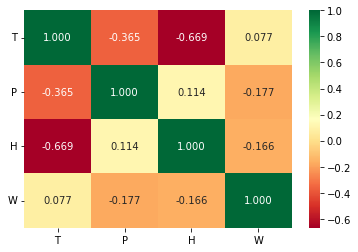

In [52]:
# Calculate the similarity matrix for the normalized AND centralized vectors 
c_sim = cosine_similarity(df_copy.T)
c_sim

#Visually display the similarity matrix (see how to plot this in Lecture 1)
plt.figure()
sns.heatmap(c_sim,
            annot=True,
            fmt='0.3f',
            cmap='RdYlGn',
            yticklabels=df_copy.columns, xticklabels = df_copy.columns
           )

plt.yticks(rotation=0)
plt.show()

#COMMENT: 

## Problem 4: Random Matrix
The file *Random_Matrix.csv* contains a 4 × 4 symmetric matrix of random data. We use that matrix in the following calculations.
* Calculate SVD of the matrix
* Next, we will analyze the structure of the original data. Construct a rank 3 approximation of the original matrix (i.e. approximate the matrix using the three largest singular values)
* Let us measure how close the approximation matrix is to the original one. For this purpose, we use a **matrix norm** called **Frobenius norm** (see note below).  Calculate the difference of the two matrices (original minus approximate), and then calculate the Frobenius norm of the difference. Smaller numbers indicate that the matrices are “closer”. Is this approximation a good one?
* Repeat the process, now with a rank 2 approximation (construct it, and measure how close to the original matrix this approximation is). Is the rank 2 approximation managing to “capture” the original data? In other words – would you use it in practical applications?

**Note**: to obtain the *Frobenius norm* of a matrix $A = [a_{ij}]_{m \times n}$, denoted as $\|A\|_F$, we calculate:
\begin{equation} \|A\|_F = \sqrt{ \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}^2 } \end{equation}
Essentially, the Frobenius norm of a matrix is a "glorified" Euclidean norm. To calculate it you could “flatten” the matrix, i.e. re-write it as a vector of its columns, and then calculate the Euclidean norm of that vector.

The Python code for this is: **nla.norm(original matrix - approximative matrix, 'fro')**

In [54]:
# Reading the raw data and convert it to numpy array
df_matrix = pd.read_csv("Random_Matrix.csv", header = None)
df_matrix
matrix = df_matrix.to_numpy()
matrix

array([[ 75.9715, -30.8837,  -3.4356,   6.1754],
       [-30.8837,  21.7457, -11.7665,  11.4336],
       [ -3.4356, -11.7665,  23.6877, -36.5359],
       [  6.1754,  11.4336, -36.5359,  78.6051]])

In [58]:
# Calculating the SVD
U, S, V =nla.svd(matrix)

S1 = np.zeros(matrix.shape)
np.fill_diagonal(S1,S)

print("Reconstructed = \n", U.dot(S1.dot(V)))
# Printing the U, S, V components
# print('U = \n', U)

# print('S = \n', S) # this one is given as an array, not a matrix

# print('V = \n', V)

Reconstructed = 
 [[ 75.9715 -30.8837  -3.4356   6.1754]
 [-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]


In [63]:
# Creating a rank 3 approximation
k = 3
Uk = U[:,:k]
Sk = S1[:k,:k]
Vk = V[:k,:]

# Assessing the 'closeness' of the approximation (use Frobenius norm)
matrix_k = Uk.dot(Sk.dot(Vk))
print("matrix_k = \n", matrix_k)
print("matrix = \n", matrix)

approx_error = nla.norm(matrix-matrix_k,'fro')
print(approx_error)



matrix_k = 
 [[ 75.97068678 -30.8855975   -3.43749752   6.17485785]
 [-30.8855975   21.74127249 -11.77092754  11.43233499]
 [ -3.43749752 -11.77092754  23.68327243 -36.53716502]
 [  6.17485785  11.43233499 -36.53716502  78.60473856]]
matrix = 
 [[ 75.9715 -30.8837  -3.4356   6.1754]
 [-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]
0.010029729604404286


In [65]:
# Creating a rank 2 approximation
k = 2
Uk = U[:,:k]
Sk = S1[:k,:k]
Vk = V[:k,:]

# Assessing the 'closeness' of the approximation (use Frobenius norm)
matrix_k = Uk.dot(Sk.dot(Vk))
print("matrix_k = \n", matrix_k)
print("matrix = \n", matrix)

approx_error = nla.norm(matrix-matrix_k,'fro')
print(approx_error)



matrix_k = 
 [[ 75.12172226 -32.63383815  -1.69555865   7.47031064]
 [-32.63383815  18.14118645  -8.18381852  14.10001208]
 [ -1.69555865  -8.18381852  20.10909365 -39.19522609]
 [  7.47031064  14.10001208 -39.19522609  76.62797996]]
matrix = 
 [[ 75.9715 -30.8837  -3.4356   6.1754]
 [-30.8837  21.7457 -11.7665  11.4336]
 [ -3.4356 -11.7665  23.6877 -36.5359]
 [  6.1754  11.4336 -36.5359  78.6051]]
9.999992983702793




# BONUS PROBLEM:
## Image Approximation
Use low-rank approximation of a matrix to construct approximations of the image *cake.jpg*. Follow the process from class. You should produce **10 images** in the rank range from k=10 to k=100 (increment by 10, best to use a for-loop or similar). What is the (lowest) rank of the approximation you would use if you had to choose from the ten images you produced? Note: the last question is subjective 😊

In [81]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

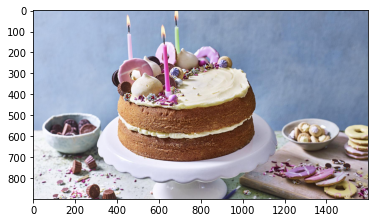

In [78]:
# Loading the image and show original image
img_original = matplotlib.image.imread('cake.jpg')

plt.figure()
plt.imshow(img_original)

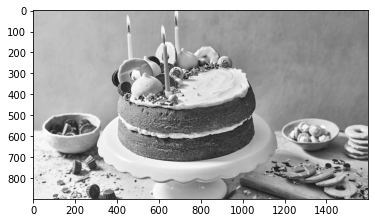

In [79]:
# Convert the image to grayscale
img = img_original[...,:3].dot([0.2989, 0.5870, 0.1140]) #conversion 'trick'

plt.figure()
plt.imshow(img, cmap='gray')

Димензија:  (1600, 900)


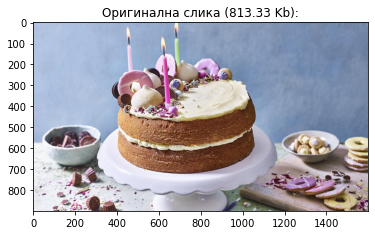

In [85]:
path = 'cake.jpg'

img = Image.open(path)
s = float(os.path.getsize(path))/256
print("Димензија: ", img.size)
plt.title("Оригинална слика (%0.2f Kb):" %s)
plt.imshow(img)
plt.show()

In [86]:
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [87]:
imgmat

matrix([[196., 196., 196., ..., 144., 146., 146.],
        [196., 196., 196., ..., 140., 141., 142.],
        [196., 196., 196., ..., 141., 142., 143.],
        ...,
        [234., 230., 226., ..., 137., 138., 144.],
        [223., 216., 212., ..., 148., 147., 150.],
        [217., 207., 202., ..., 159., 159., 159.]])

In [88]:
# getting the SVD of the image matrix
U, S, V =  np.linalg.svd(imgmat)              

#do not print the matrtices, they are too big!

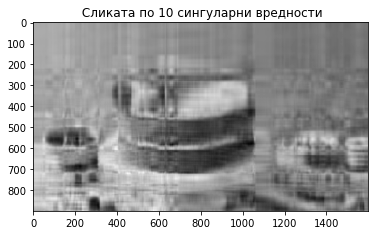

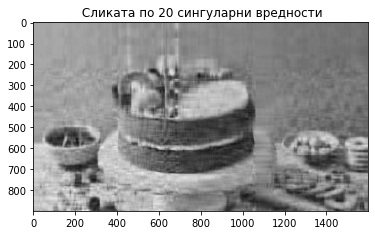

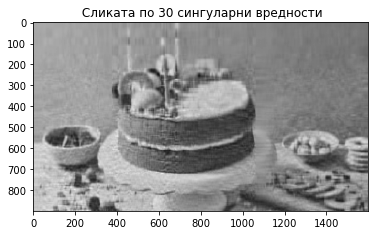

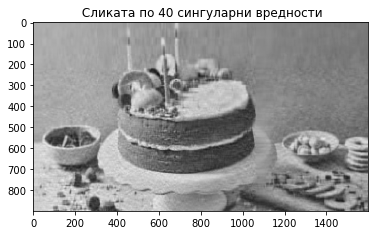

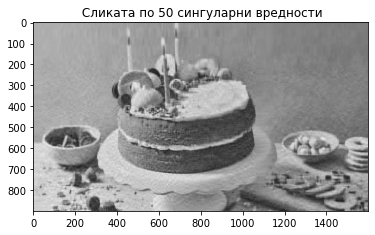

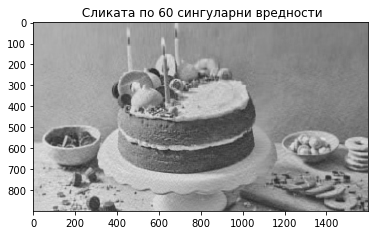

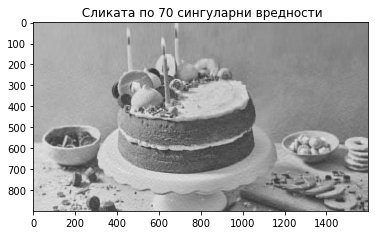

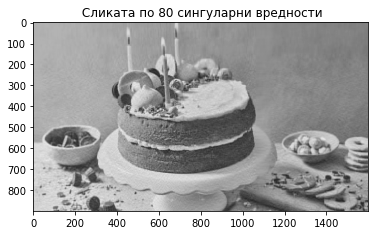

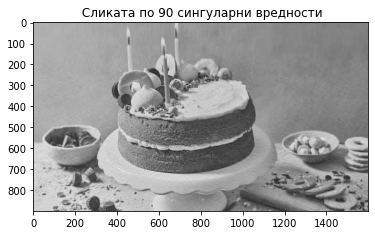

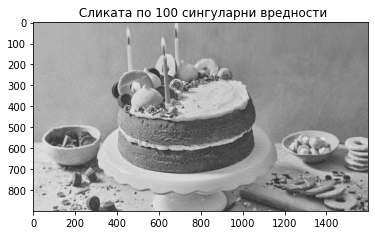

In [91]:
#creating low-rank approximations of orde k=10, 20, ..., 100

for k in range(10, 101, 10):
    cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(V[:k,:]) 
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Сликата по %s сингуларни вредности" %k
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))
    time.sleep(2)

# Comment: I would use the approximation for k = 60

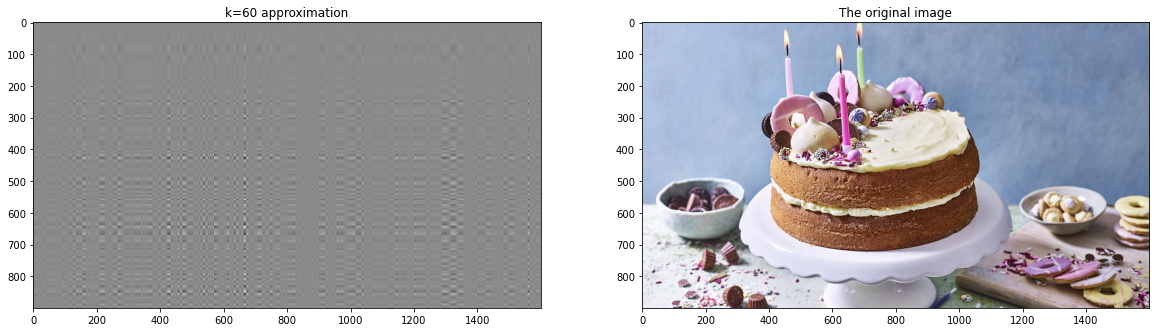

In [102]:
## ADDITION: Getting my best approximation next to the original image
k = 60

img_k = S[k] * np.dot(U[:,k],V[k,:])


#Displaying
fig = plt.figure(figsize=(20, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(img_k, cmap='gray')
plt.title('k=60 approximation')
fig.add_subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('The original image')
plt.show()

#Saving the images
plt.imsave('image_full.png', img, cmap = 'gray')
plt.imsave('image_rank_60.png', img_k, cmap = 'gray')

In [99]:
# Memory compression if we use k=60 approximation
print(f'The original image takes {img.size} memory places')

new_mem = U_60.size + V_60.size + S_60.size
print(f'The rank 60 approximaton can be obtained using {new_mem} memory places')

print(f'This is {np.round(new_mem/img.size*100, 2)}% of the original memory size')

The original image takes (1600, 900) memory places


NameError: name 'U_60' is not defined